In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob 
from sklearn.model_selection import train_test_split
import os 

%matplotlib inline

# Loading dataset

We could use the function "sklearn.model_selection.train_test_split" but our dataset contains many correlated sequences of images which would end up both in the training and testing sets when performing a random shuffle. I will therefore manually split the data using the file names in each folder. 

In [30]:
vehicle_dirs = [x[0] for x in os.walk('./dataset/vehicles/')]  # List pf directories containing car images

In [77]:
test_percent = 0.2     # Percentage of data to be used for testing

cars = {'train': [], 'test': []}
notcars = {'train': [], 'test': []}
for folder in vehicle_dirs:
    car_images = glob.glob(folder + '/*.png')
    car_images.sort()
    if len(car_images)>0:
        cars['test'].append(car_images[:int(len(car_images)*test_percent)])
        cars['train'].append(car_images[int(len(car_images)*test_percent):])
        
cars['train'] = np.concatenate(cars['train'])
cars['test'] = np.concatenate(cars['test'])
    
notcar_images = glob.glob('./dataset/non-vehicles/**/*.png', recursive=True)
split = train_test_split(notcar_images, test_size = test_percent)

notcars['train'] = np.array(split[0])
notcars['test'] = np.array(split[1])
notcars['train']

print('Number of training/testing car samples: ', len(cars['train']), len(cars['test']))
print('Number of training/testing not-car samples: ', len(notcars['train']), len(notcars['test']))


Number of training/testing car samples:  7037 1755
Number of training/testing not-car samples:  7174 1794


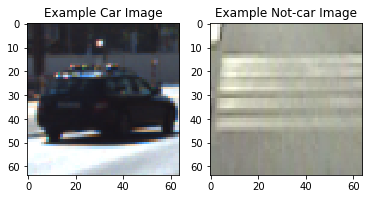

In [78]:
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars['train']))
notcar_ind = np.random.randint(0, len(notcars['train']))
    
# Read in car / not-car images
car_image = mpimg.imread(cars['train'][car_ind])
notcar_image = mpimg.imread(notcars['train'][notcar_ind])

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')